The dataset is about bankruptcy prediction of Polish companies. The data was collected from Emerging Markets Information Service ([EMIS](https://www.emis.com)), which is a database containing information on emerging markets around the world. The bankrupt companies were analyzed in the period 2000-2012, while the still operating companies were evaluated from 2007 to 2013.
datasetLink:"https://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data"

In [1]:
#importing libraries 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


In [2]:
#the data was in arff file formate,so i used scipy library to read it 
from scipy.io import arff
data = arff.loadarff('3year.arff')
df = pd.DataFrame(data[0])

In [3]:
df.shape

(10503, 65)

In [4]:
df.columns

Index(['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr8',
       'Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14', 'Attr15',
       'Attr16', 'Attr17', 'Attr18', 'Attr19', 'Attr20', 'Attr21', 'Attr22',
       'Attr23', 'Attr24', 'Attr25', 'Attr26', 'Attr27', 'Attr28', 'Attr29',
       'Attr30', 'Attr31', 'Attr32', 'Attr33', 'Attr34', 'Attr35', 'Attr36',
       'Attr37', 'Attr38', 'Attr39', 'Attr40', 'Attr41', 'Attr42', 'Attr43',
       'Attr44', 'Attr45', 'Attr46', 'Attr47', 'Attr48', 'Attr49', 'Attr50',
       'Attr51', 'Attr52', 'Attr53', 'Attr54', 'Attr55', 'Attr56', 'Attr57',
       'Attr58', 'Attr59', 'Attr60', 'Attr61', 'Attr62', 'Attr63', 'Attr64',
       'class'],
      dtype='object')

In [5]:
df=df.rename({"class":"bankrupt"},axis = 1 )


In [6]:
df.columns[-1]

'bankrupt'

In [7]:
df.head(3)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,bankrupt
0,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.1225,1.1961,0.46359,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,b'0'
1,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,0.53962,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,b'0'
2,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.9881,1.0077,0.67566,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,b'0'


In [8]:
# setting the index name as company_id 
df.index.name = "company_id"
df.head(2)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,bankrupt
company_id,,,,,,,,,,,,,,,,,,,,,
0,0.17419,0.41299,0.14371,1.3480,-28.9820,0.60383,0.21946,1.1225,1.1961,0.46359,...,0.163960,0.37574,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,b'0'
1,0.14624,0.46038,0.28230,1.6294,2.5952,0.00000,0.17185,1.1721,1.6018,0.53962,...,0.027516,0.27100,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,b'0'


In [9]:
df["bankrupt"].value_counts()

b'0'    10008
b'1'      495
Name: bankrupt, dtype: int64

<AxesSubplot:title={'center':'data_balance'}, xlabel='class', ylabel='frequency'>

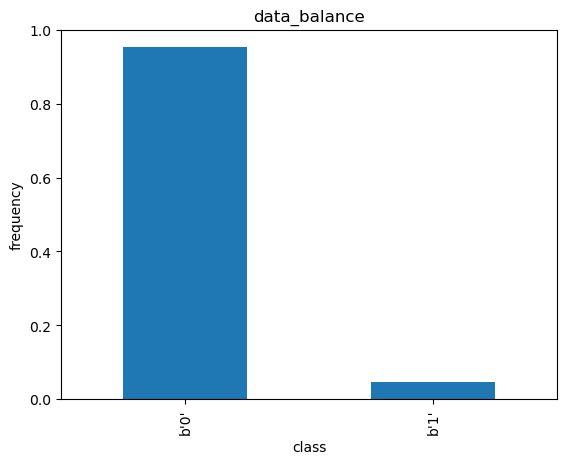

In [10]:
#visualizing the data class imbalance
(df["bankrupt"].value_counts(normalize=True)
 .plot(kind="bar",xlabel="class",ylabel="frequency",title="data_balance"))

In [11]:
# encoding the labels to [0] and [1]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["bankrupt"] = le.fit_transform(df.bankrupt)

In [12]:
df.head(2)
#noticing that (0) means (not_bankrupted) , and (1) means (bankrupted)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,bankrupt
company_id,,,,,,,,,,,,,,,,,,,,,
0,0.17419,0.41299,0.14371,1.3480,-28.9820,0.60383,0.21946,1.1225,1.1961,0.46359,...,0.163960,0.37574,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,0
1,0.14624,0.46038,0.28230,1.6294,2.5952,0.00000,0.17185,1.1721,1.6018,0.53962,...,0.027516,0.27100,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,0


## checking corrolated features and deleting it 

In [13]:
#find the corrolated features (corrolation more than .98)
corr_matrix=df.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.99)]
print(to_drop)

['Attr3', 'Attr7', 'Attr10', 'Attr11', 'Attr14', 'Attr17', 'Attr23', 'Attr25', 'Attr26', 'Attr38', 'Attr46', 'Attr49', 'Attr50', 'Attr51', 'Attr52', 'Attr54', 'Attr58', 'Attr62']


In [14]:
# another function to find the corrolation (this is for my reference )
def correlation(dataset, threshold):
    col_corr = list() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.append(colname)
    return col_corr   
col_corr=correlation(df,.99)

In [15]:
col_corr

['Attr7',
 'Attr10',
 'Attr14',
 'Attr14',
 'Attr17',
 'Attr23',
 'Attr25',
 'Attr26',
 'Attr38',
 'Attr46',
 'Attr49',
 'Attr50',
 'Attr51',
 'Attr52',
 'Attr54',
 'Attr62']

In [16]:
df = df.drop(columns=col_corr)
df.shape

(10503, 50)

## checking features normality and removing outliers 

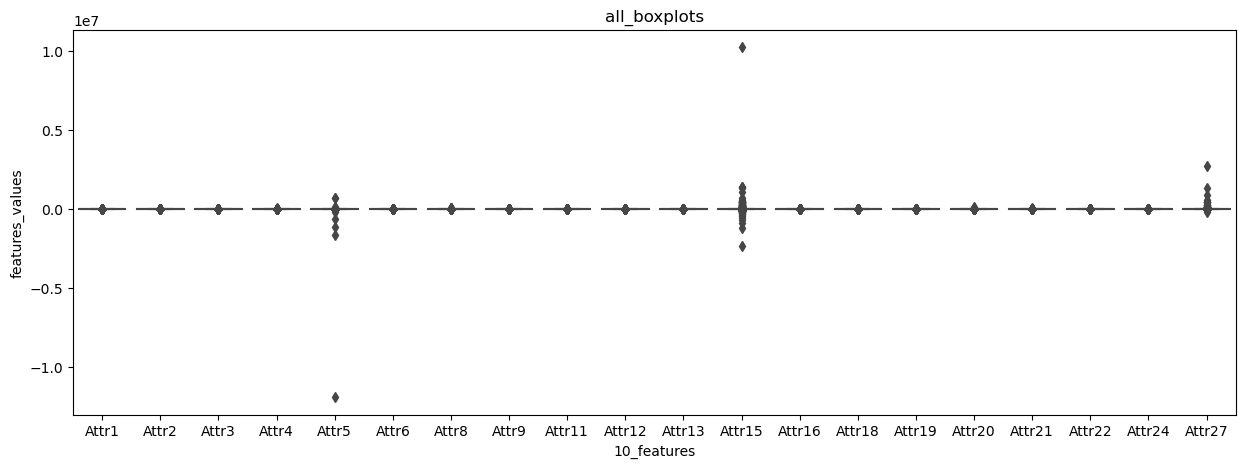

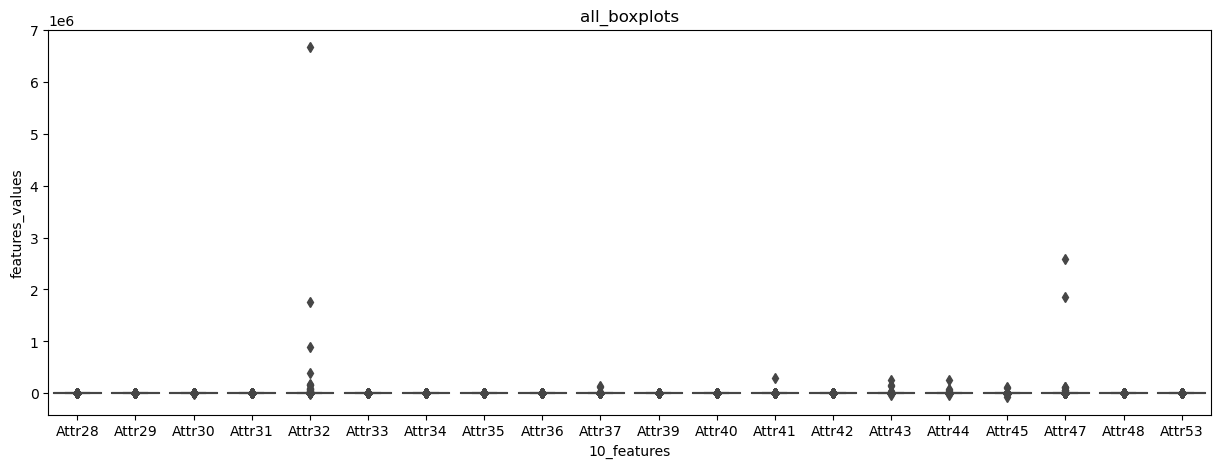

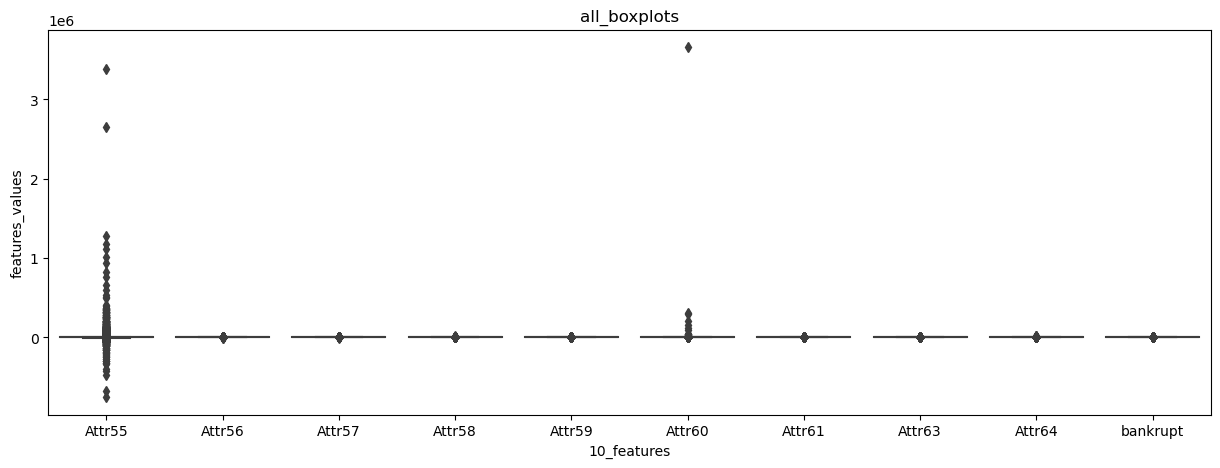

In [17]:
# Create boxplot for all data 
 
j=0    
while j<=len(df.columns):
    features_group=list(df.columns[j:j+20])
    j+=20
    plt.figure(figsize=(15,5))
    sns.boxplot(data=df[features_group])
    plt.xlabel("10_features")
    plt.ylabel("features_values")
    plt.title("all_boxplots")
    plt.show();

boxblots shows that there is many features with many outliers (this observation needs more invistigation )

#### as shown in the previous boxplots ,many features has unusual standard variation , which may indicate outliers in the data 


## deleting outliers 

In [18]:
def find_outliers_IQR(df):

    q1=df.quantile(0.25)

    q3=df.quantile(0.75)

    IQR=q3-q1

    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

    return outliers

In [19]:
for i in df.columns.to_list()[:-1]:
    
    index = find_outliers_IQR(df[i]).index
    df.drop(index,axis=0,inplace=True)
    print(df.shape)

(9237, 50)
(9125, 50)
(9016, 50)
(8078, 50)
(7068, 50)
(5833, 50)
(5370, 50)
(5086, 50)
(4915, 50)
(4528, 50)
(4296, 50)
(3549, 50)
(3410, 50)
(3336, 50)
(3246, 50)
(3089, 50)
(2929, 50)
(2891, 50)
(2786, 50)
(2441, 50)
(2181, 50)
(2139, 50)
(2053, 50)
(1996, 50)
(1940, 50)
(1838, 50)
(1817, 50)
(1759, 50)
(1698, 50)
(1519, 50)
(1492, 50)
(1352, 50)
(1277, 50)
(1270, 50)
(1237, 50)
(1217, 50)
(1116, 50)
(1098, 50)
(1083, 50)
(1040, 50)
(847, 50)
(811, 50)
(769, 50)
(755, 50)
(713, 50)
(666, 50)
(619, 50)
(600, 50)
(569, 50)


In [20]:
#checking the corrolation between the features and the target 
sum(pd.DataFrame(df.corr())["bankrupt"].abs().sort_values()>.7)

1

there is no corrolation between any feature and the target 

## Split the data 

In [21]:
target = "bankrupt"
X = df.drop(columns=target)
y = df[target]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

## oversampling

In [23]:
#checking again for data balance 
df["bankrupt"].value_counts()


0    548
1     21
Name: bankrupt, dtype: int64

In [24]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train,y_train)
print(X_train_over.shape)
X_train_over.head()

(886, 49)


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr8,Attr9,Attr11,Attr12,...,Attr53,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr63,Attr64
0,0.103310,0.48495,0.172420,1.4292,3.27310,0.17263,1.00400,1.0666,0.127320,0.316900,...,1.1435,5201.40,0.062403,0.212180,0.93760,0.17085,14.3740,6.8038,5.4872,5.1775
1,0.004536,0.57049,0.127130,1.2411,-18.26400,0.00000,0.75288,1.3498,0.026469,0.008603,...,1.2427,514.55,0.010445,0.010561,0.99672,0.10067,7.1969,2.9313,2.5602,3.9057
2,0.081125,0.48184,0.255910,1.9830,-0.96897,0.00000,1.07540,1.8870,0.157640,0.366150,...,1.0711,602.11,0.046166,0.156560,0.95154,0.41667,7.8095,12.2690,7.2482,3.9007
3,0.104800,0.49771,0.084913,1.1990,-26.57600,0.10480,0.99291,1.0786,0.130360,0.305580,...,1.0117,1427.90,0.072846,0.212060,0.92715,0.14387,9.1666,6.6252,4.4880,3.9196
4,0.012459,0.47030,0.117760,1.2592,-21.21300,0.00000,1.12630,1.8834,0.041749,0.045823,...,1.2379,390.11,-0.008450,0.023521,0.98936,0.00000,8.3773,5.4833,4.1455,4.4014


In [25]:
# deciding a baseline for the result ( this is based on the distribution 
#of the positive and negatibe labels in the target features)
acc_baseline = y_train_over.value_counts(normalize=True).max()
acc_baseline

0.5

## Decision Tree Model

First model ( Decision Tree , No over_sampling )

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
model_reg = make_pipeline(SimpleImputer(strategy="median"),StandardScaler(),DecisionTreeClassifier(random_state=42))
model_reg.fit(X_train,y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

Second model (Decision Tree , and Over_sampling )

In [28]:
DT_model_over = make_pipeline(SimpleImputer(strategy="median"),DecisionTreeClassifier(random_state=42))
DT_model_over.fit(X_train_over,y_train_over)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [29]:
depth = DT_model_over.named_steps["decisiontreeclassifier"].get_depth()
depth

7

In [30]:
for m in [model_reg, DT_model_over]:
    acc_train = m.score(X_train,y_train)
    acc_test = m.score(X_test,y_test)
    print("Training Accuracy:", round(acc_train, 4))
    print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.9825
Training Accuracy: 1.0
Test Accuracy: 0.9912


#### very good accuracy for both models, but accuracy alone is not enough to judge the model , next I will calculate f1_score , recall , precesion

In [31]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(y_test,DT_model_over.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       105
           1       1.00      0.89      0.94         9

    accuracy                           0.99       114
   macro avg       1.00      0.94      0.97       114
weighted avg       0.99      0.99      0.99       114



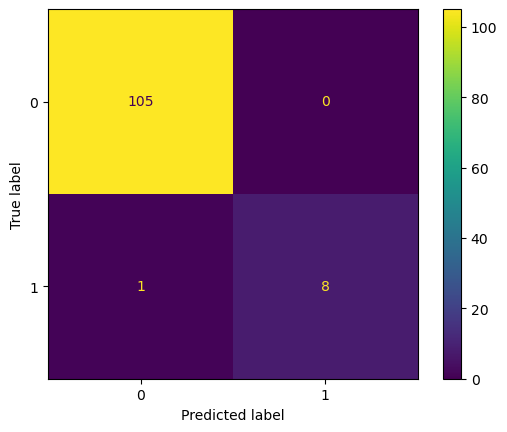

In [33]:
ConfusionMatrixDisplay.from_estimator(DT_model_over,X_test,y_test)

Visualizing Decision Tree Results


In [159]:
importances = DT_model_over.named_steps["decisiontreeclassifier"].feature_importances_
feat_imp = pd.Series(importances,index=X_train_over.columns).sort_values(ascending=True)[-10:]

In [160]:
feat_imp

Attr21    0.000000
Attr22    0.000000
Attr28    0.000000
Attr16    0.000000
Attr64    0.000000
Attr34    0.008839
Attr4     0.024417
Attr40    0.139472
Attr24    0.279632
Attr27    0.547639
dtype: float64

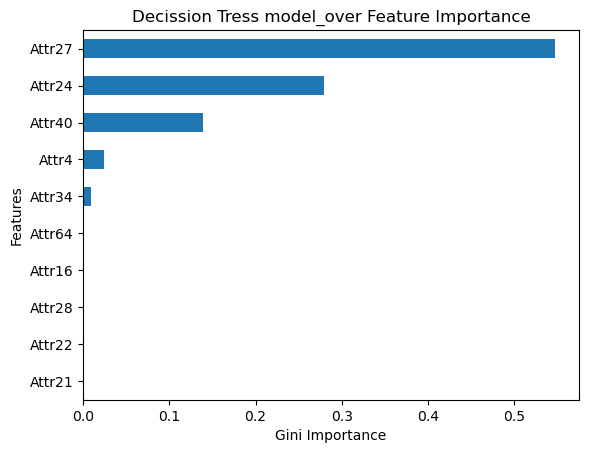

In [161]:
feat_imp.plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Features")
plt.title("Decission Tress model_over Feature Importance");

In [37]:
import pickle
with open ("model-1.pkl","wb")as f:
    pickle.dump(DT_model_over,f)

In [38]:
with open("model-1.pkl", "rb") as f:
    loaded_model = pickle.load(f)

## Random Forest Model

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
clf = make_pipeline(SimpleImputer(),StandardScaler(),RandomForestClassifier(random_state=42))
print(clf)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])


Doing cross_validation to check the possible results of that model 

In [41]:
cv_acc_scores = cross_val_score(clf,X_train_over,y_train_over,cv=5,n_jobs=-1)
print(cv_acc_scores)

[1.         1.         0.99435028 1.         1.        ]


Deciding the ranges of the hyperparameters 

In [42]:
params = {"simpleimputer__strategy":["mean","median"],
          "randomforestclassifier__n_estimators":range(25,100,25),
          "randomforestclassifier__max_depth":range(10,50,10)}
params

{'simpleimputer__strategy': ['mean', 'median'],
 'randomforestclassifier__n_estimators': range(25, 100, 25),
 'randomforestclassifier__max_depth': range(10, 50, 10)}

In [43]:
RF_model = GridSearchCV(clf,param_grid=params,cv=3,n_jobs=-1,verbose=1)
RF_model

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [44]:
RF_model.fit(X_train_over,y_train_over)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [45]:
cv_results = pd.DataFrame(RF_model.cv_results_)
cv_results.head(2)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.118674,0.043226,0.024668,0.024282,10,25,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",1.0,0.99661,0.99661,0.99774,0.001598,22
1,0.162344,0.039804,0.031671,0.029962,10,25,median,"{'randomforestclassifier__max_depth': 10, 'ran...",1.0,0.99661,0.99661,0.99774,0.001598,22


In [46]:
RF_model.best_params_,RF_model.best_score_

({'randomforestclassifier__max_depth': 10,
  'randomforestclassifier__n_estimators': 50,
  'simpleimputer__strategy': 'mean'},
 0.9988700564971751)

so the best model depth is 40 and n_estimators = 75 , and the imputer strategy should be the median 

In [47]:
acc_train = RF_model.score(X_train,y_train)
acc_test = RF_model.score(X_test,y_test)
print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 0.9978
Test Accuracy: 0.9474


In [48]:
print(classification_report(y_test,RF_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       105
           1       1.00      0.33      0.50         9

    accuracy                           0.95       114
   macro avg       0.97      0.67      0.74       114
weighted avg       0.95      0.95      0.93       114



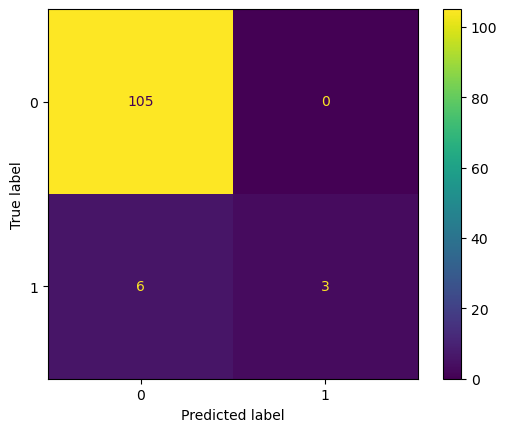

In [49]:
ConfusionMatrixDisplay.from_estimator(RF_model,X_test,y_test)

## Gradient Boosting Classifier Model

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

In [51]:
clf = make_pipeline(SimpleImputer(),StandardScaler(),GradientBoostingClassifier())

In [52]:
params = {"simpleimputer__strategy":["mean","median"],"gradientboostingclassifier__max_depth":range(2,5),"gradientboostingclassifier__n_estimators":range(20,31,5)}
params

{'simpleimputer__strategy': ['mean', 'median'],
 'gradientboostingclassifier__max_depth': range(2, 5),
 'gradientboostingclassifier__n_estimators': range(20, 31, 5)}

In [53]:
GBC_model = GridSearchCV(clf,param_grid=params,cv=5,n_jobs=-1,verbose=1)

In [54]:
GBC_model.fit(X_train_over,y_train_over)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('standardscaler', StandardScaler()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__max_depth': range(2, 5),
                         'gradientboostingclassifier__n_estimators': range(20, 31, 5),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [55]:
results = pd.DataFrame(GBC_model.cv_results_)
results.sort_values("rank_test_score").head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gradientboostingclassifier__max_depth,param_gradientboostingclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
17,0.210214,0.018734,0.003601,0.000490,4,30,median,"{'gradientboostingclassifier__max_depth': 4, '...",1.0,0.99435,0.994350,0.994350,1.000000,0.996610,0.002768,1
15,0.174611,0.006945,0.002801,0.000400,4,25,median,"{'gradientboostingclassifier__max_depth': 4, '...",1.0,0.99435,0.994350,0.994350,0.994350,0.995480,0.002260,2
13,0.157410,0.013546,0.003201,0.000400,4,20,median,"{'gradientboostingclassifier__max_depth': 4, '...",1.0,0.99435,0.988701,0.994350,0.994350,0.994350,0.003573,3
11,0.194015,0.002280,0.003001,0.000002,3,30,median,"{'gradientboostingclassifier__max_depth': 3, '...",1.0,0.99435,0.983051,0.988701,1.000000,0.993220,0.006589,4
14,0.200614,0.013381,0.003200,0.000400,4,25,mean,"{'gradientboostingclassifier__max_depth': 4, '...",1.0,0.99435,0.988701,0.977401,0.988701,0.989831,0.007495,5


In [56]:
GBC_model.best_params_

{'gradientboostingclassifier__max_depth': 4,
 'gradientboostingclassifier__n_estimators': 30,
 'simpleimputer__strategy': 'median'}

In [57]:
print(classification_report(y_test,GBC_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       105
           1       1.00      0.89      0.94         9

    accuracy                           0.99       114
   macro avg       1.00      0.94      0.97       114
weighted avg       0.99      0.99      0.99       114



improving the model recall , very good!

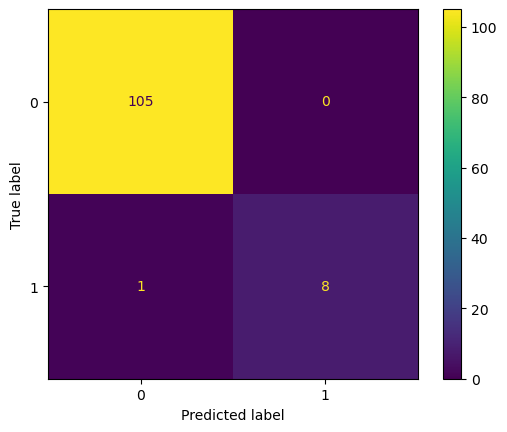

In [58]:
ConfusionMatrixDisplay.from_estimator(GBC_model,X_test,y_test)

better performance on the positive labels , but the precesion is low 

## Logistic Regression Model

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
clf = make_pipeline(SimpleImputer(),StandardScaler(),LogisticRegression(random_state=42,max_iter=500))
print(clf)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=500, random_state=42))])


In [61]:
LogisticRegression

sklearn.linear_model._logistic.LogisticRegression

In [62]:
pd.DataFrame(clf.get_params())

,memory,steps,verbose,simpleimputer,standardscaler,logisticregression,simpleimputer__add_indicator,simpleimputer__copy,simpleimputer__fill_value,simpleimputer__missing_values,...,logisticregression__l1_ratio,logisticregression__max_iter,logisticregression__multi_class,logisticregression__n_jobs,logisticregression__penalty,logisticregression__random_state,logisticregression__solver,logisticregression__tol,logisticregression__verbose,logisticregression__warm_start
0,None,"(simpleimputer, SimpleImputer())",False,SimpleImputer(),StandardScaler(),"LogisticRegression(max_iter=500, random_state=42)",False,True,None,NaN,...,None,500,auto,None,l2,42,lbfgs,0.0001,0,False
1,None,"(standardscaler, StandardScaler())",False,SimpleImputer(),StandardScaler(),"LogisticRegression(max_iter=500, random_state=42)",False,True,None,NaN,...,None,500,auto,None,l2,42,lbfgs,0.0001,0,False
2,None,"(logisticregression, LogisticRegression(max_it...",False,SimpleImputer(),StandardScaler(),"LogisticRegression(max_iter=500, random_state=42)",False,True,None,NaN,...,None,500,auto,None,l2,42,lbfgs,0.0001,0,False


In [63]:
clf.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'simpleimputer', 'standardscaler', 'logisticregression', 'simpleimputer__add_indicator', 'simpleimputer__copy', 'simpleimputer__fill_value', 'simpleimputer__missing_values', 'simpleimputer__strategy', 'simpleimputer__verbose', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'logisticregression__C', 'logisticregression__class_weight', 'logisticregression__dual', 'logisticregression__fit_intercept', 'logisticregression__intercept_scaling', 'logisticregression__l1_ratio', 'logisticregression__max_iter', 'logisticregression__multi_class', 'logisticregression__n_jobs', 'logisticregression__penalty', 'logisticregression__random_state', 'logisticregression__solver', 'logisticregression__tol', 'logisticregression__verbose', 'logisticregression__warm_start'])

In [64]:
params = {"simpleimputer__strategy":["mean","median"],
          "logisticregression__penalty":['l1', 'l2'],
          "logisticregression__multi_class":['ovr', 'multinomial'],
          'logisticregression__C':[.1,.3,.6,.9],
          'logisticregression__solver':[ 'lbfgs',  'saga']}
params

{'simpleimputer__strategy': ['mean', 'median'],
 'logisticregression__penalty': ['l1', 'l2'],
 'logisticregression__multi_class': ['ovr', 'multinomial'],
 'logisticregression__C': [0.1, 0.3, 0.6, 0.9],
 'logisticregression__solver': ['lbfgs', 'saga']}

In [65]:
LR_model = GridSearchCV(clf,param_grid=params,cv=5,n_jobs=-1,verbose=1)

In [66]:
LR_model.fit(X_train_over,y_train_over)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, sel

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=500,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.1, 0.3, 0.6, 0.9],
                         'logisticregression__multi_class': ['ovr',
                                                             'multinomial'],
                         'logisticregression__penalty': ['l1', 'l2'],
                         'logisticregression__solver': ['lbfgs', 'saga'],
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [67]:
LR_model.best_params_

{'logisticregression__C': 0.9,
 'logisticregression__multi_class': 'ovr',
 'logisticregression__penalty': 'l1',
 'logisticregression__solver': 'saga',
 'simpleimputer__strategy': 'mean'}

In [68]:
print(classification_report(y_test,LR_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       105
           1       0.14      0.11      0.12         9

    accuracy                           0.88       114
   macro avg       0.53      0.53      0.53       114
weighted avg       0.86      0.88      0.87       114



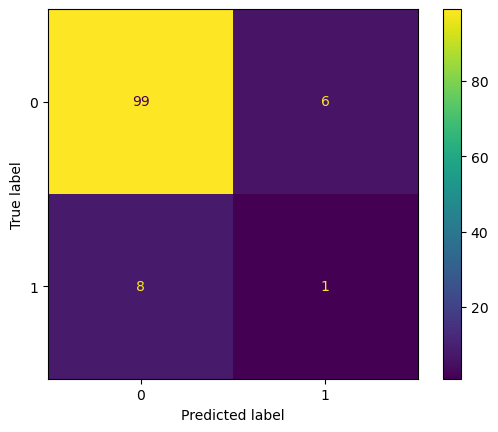

In [69]:
ConfusionMatrixDisplay.from_estimator(LR_model,X_test,y_test)

accuracy is low , recall is low for both (negative and positive labels)

## A Function to control the threshhold probabilitly of deciding the label prediction

In [70]:
import ipywidgets as widgets
from ipywidgets import interact

In [71]:
def make_cnf_matrix(threshold):
    y_pred_proba=RF_model.predict_proba(X_test)[:,-1]
    y_pred=y_pred_proba>threshold
    conf_matrix=confusion_matrix(y_test,y_pred)
    tn,fp,fn,tp=conf_matrix.ravel()
    print(f"false positive {fp}")
    print(f"false negative {fn}")
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred,colorbar=False)
    print(classification_report(y_test,y_pred))
   


thresh_widget = widgets.FloatSlider(min=0,max=1,value=.5,step=.05)

interact(make_cnf_matrix, threshold=thresh_widget);

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.05), Output()), _dom_cla…

# testing on a new dataset

In [140]:
test_data = arff.loadarff('2year.arff')
test_df = pd.DataFrame(test_data[0])

In [141]:
test_df.shape

(10173, 65)

In [142]:
test_df=test_df.rename({"class":"bankrupt"},axis = 1 )

In [143]:
test_df["bankrupt"] = le.fit_transform(test_df.bankrupt)

In [144]:
test_df = test_df.drop(columns=col_corr)
test_df.shape

(10173, 50)

In [145]:
target = "bankrupt"
final_x_test = test_df.drop(columns=target)
final_y_test = test_df[target]

In [146]:
# testing on Logistic Regression Model
print(classification_report(final_y_test,LR_model.predict(final_x_test)))

              precision    recall  f1-score   support

           0       0.96      0.77      0.86      9773
           1       0.04      0.25      0.07       400

    accuracy                           0.75     10173
   macro avg       0.50      0.51      0.47     10173
weighted avg       0.93      0.75      0.83     10173



In [147]:
# testing on Decession tree Model
print(classification_report(final_y_test,DT_model_over.predict(final_x_test)))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      9773
           1       0.26      0.31      0.28       400

    accuracy                           0.94     10173
   macro avg       0.61      0.64      0.62     10173
weighted avg       0.94      0.94      0.94     10173



In [148]:
# Testing on Random forest model
print(classification_report(final_y_test,RF_model.predict(final_x_test)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      9773
           1       0.75      0.04      0.07       400

    accuracy                           0.96     10173
   macro avg       0.86      0.52      0.53     10173
weighted avg       0.95      0.96      0.94     10173



In [149]:
# Testing on Gradient boosting model
print(classification_report(final_y_test,GBC_model.predict(final_x_test)))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96      9773
           1       0.21      0.38      0.27       400

    accuracy                           0.92     10173
   macro avg       0.59      0.66      0.62     10173
weighted avg       0.94      0.92      0.93     10173



## Testing on another new dataset 

In [150]:
test_data_2 = arff.loadarff('4year.arff')
test_df_2 = pd.DataFrame(test_data_2[0])

In [151]:
test_df_2=test_df_2.rename({"class":"bankrupt"},axis = 1 )

In [152]:
test_df_2["bankrupt"] = le.fit_transform(test_df_2.bankrupt)

In [153]:
test_df_2 = test_df_2.drop(columns=col_corr)
test_df_2.shape

(9792, 50)

In [154]:
target = "bankrupt"
final_x_test_2 = test_df_2.drop(columns=target)
final_y_test_2 = test_df_2[target]

In [155]:
# testing on Logistic Regression Model
print(classification_report(final_y_test_2,LR_model.predict(final_x_test_2)))

              precision    recall  f1-score   support

           0       0.95      0.77      0.85      9277
           1       0.07      0.30      0.11       515

    accuracy                           0.75      9792
   macro avg       0.51      0.53      0.48      9792
weighted avg       0.91      0.75      0.81      9792



In [156]:
# Testing on Decession Tree Model
print(classification_report(final_y_test_2,DT_model_over.predict(final_x_test_2)))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      9277
           1       0.33      0.27      0.29       515

    accuracy                           0.93      9792
   macro avg       0.64      0.62      0.63      9792
weighted avg       0.93      0.93      0.93      9792



In [157]:
# Testing on Gradient Boosting Model
print(classification_report(final_y_test_2,GBC_model.predict(final_x_test_2)))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      9277
           1       0.24      0.30      0.27       515

    accuracy                           0.91      9792
   macro avg       0.60      0.62      0.61      9792
weighted avg       0.92      0.91      0.92      9792



In [158]:
# Testing on Random forest model
print(classification_report(final_y_test_2,RF_model.predict(final_x_test_2)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      9277
           1       0.74      0.03      0.05       515

    accuracy                           0.95      9792
   macro avg       0.84      0.51      0.51      9792
weighted avg       0.94      0.95      0.92      9792



### Finally the best model in terms of Recall is Gradient Boosting Classifier